In [1]:
#!pip install opencv-python
#!pip install matplotlib

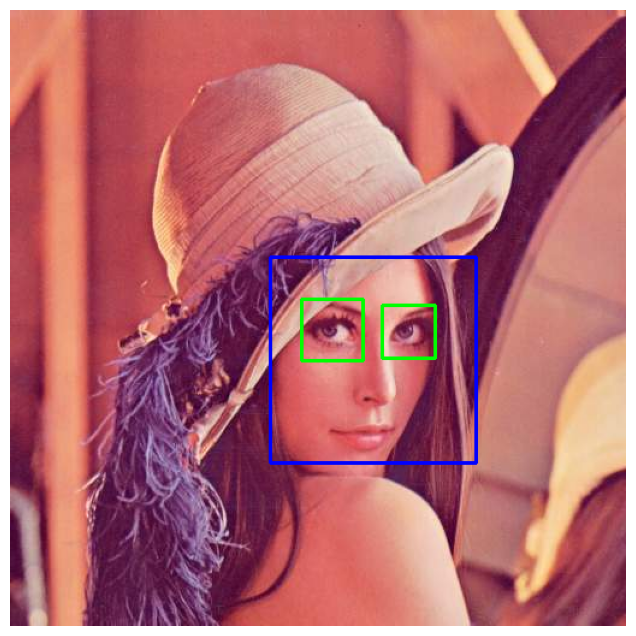

In [2]:
import cv2
import matplotlib.pyplot as plt

# Haarcascade 모델 로드 (얼굴, 눈)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 레나 이미지 로드
image = cv2.imread(cv2.samples.findFile("lena.jpg"))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 얼굴 검출
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    # 얼굴에 사각형 표시 (파란색)
    cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # 얼굴 영역 설정
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = image[y:y + h, x:x + w]

    # 눈 검출
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15))
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # 녹색

# 결과 출력
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [3]:
# 0번부터 5번까지 시도
for i in range(5):
    cap = cv2.VideoCapture(i)
    if cap.isOpened():
        print(f"Camera {i} is available.")
        cap.release()

Camera 0 is available.


In [4]:
# Haarcascade 모델 로드 (얼굴, 눈)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 웹캠 열기
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("웹캠을 열 수 없습니다.")
    exit()

while True:
    # 프레임 읽기
    ret, frame = cap.read()
    if not ret:
        break

    # 흑백 변환
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 얼굴 검출
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # 얼굴에 사각형 표시 (파란색)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

        # 얼굴 영역 설정
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]

        # 눈 검출
        eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.1, minNeighbors=10, minSize=(15, 15))
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)  # 녹색

    # 화면에 출력
    cv2.imshow("Face & Eye Detection", frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 종료 처리
cap.release()
cv2.destroyAllWindows()